In [52]:
import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
# sample = "vbf_powheg"
sample = "ggh_powheg"
# sample = "dy_M-100To200"
# sample = "data_A"
# sample = "data_D"
full_load_path = f"/depot/cms/users/yun79/valerie/fork/original/clean/copperhead_fork2/stage2_quick_validation/{sample}/*.parquet"


import dask.dataframe as dd
import pandas as pd
df_old = dd.read_parquet(full_load_path)


In [53]:
# print(df_old.columns.tolist())

In [54]:
region = df_old.region.compute()


In [55]:
scores = df_old.score_ggHnew_2018_nominal.compute()
print(np.max(scores))
print(np.min(scores))

0.9775999188423157
4.877048240814474e-07


In [5]:
binning_map = {
    "score_ggHnew_2018_nominal" : [0, 1, 50],
}

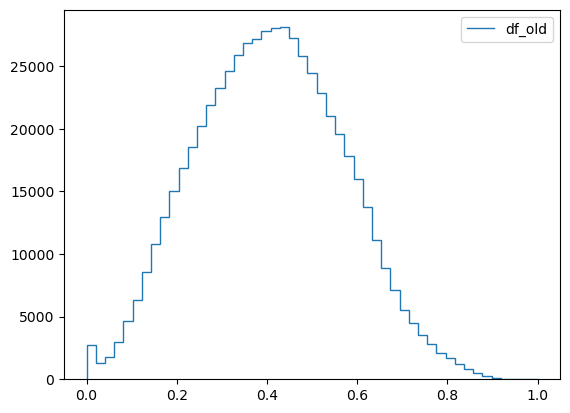

In [6]:
binning = np.linspace(*binning_map["score_ggHnew_2018_nominal"])

hist_old, edges = np.histogram(scores, bins=binning)


plt.stairs(hist_old, edges, label = "df_old")
plt.legend(loc="upper right")
plt.show()

In [56]:
csv_path =  "/depot/cms/hmm/vscheure/v9withRun3/stage2_output/2018/ggh_powheg/ggh_powheg.csv"
df_valerie = pd.read_csv(csv_path)

In [57]:
len(df_valerie)

622220

In [58]:
len(scores)

595994

In [11]:
df_valerie.head()

,entry,dataset,region,channel_nominal,category,dimuon_mass,score_ggHnew_2018_nominal,wgt_nominal
0,2,ggh_powheg,h-peak,ggh,All,126.358860,0.453473,0.000594
1,6,ggh_powheg,h-peak,ggh,All,126.172405,0.293614,0.000756
2,7,ggh_powheg,h-peak,ggh,All,124.239132,0.599458,0.000591
3,8,ggh_powheg,h-peak,ggh,All,123.407955,0.710822,0.000597
4,14,ggh_powheg,h-peak,ggh,All,124.892743,0.489720,0.000571


In [12]:
df_zpeak = df_valerie[~((df_valerie.region == "h-peak") | (df_valerie.region == "h-sidebands"))]


In [13]:
df_zpeak

,entry,dataset,region,channel_nominal,category,dimuon_mass,score_ggHnew_2018_nominal,wgt_nominal
81,137,ggh_powheg,z-peak,ggh,All,94.474872,0.033268,0.000516
125,212,ggh_powheg,z-peak,ggh,All,103.933244,0.444499,0.000596
148,260,ggh_powheg,z-peak,ggh,All,102.805174,0.311467,0.000623
288,476,ggh_powheg,z-peak,ggh,All,102.718358,0.377356,0.000602
371,615,ggh_powheg,z-peak,ggh,All,100.759409,0.045346,-0.000589
...,...,...,...,...,...,...,...,...
621811,99186,ggh_powheg,z-peak,ggh,All,96.272526,0.100361,0.000784
621817,99195,ggh_powheg,z-peak,ggh,All,105.250944,0.149580,0.000633
621854,99262,ggh_powheg,z-peak,ggh,All,88.313872,0.252273,0.000845
622126,99742,ggh_powheg,z-peak,ggh,All,99.870922,0.036618,0.000740


In [14]:
sub_cat = df_old.dimuon_mass.compute()[:5]
sub_cat

entry
2     126.358860
6     126.172405
7     124.239132
8     123.407955
14    124.892743
Name: dimuon_mass, dtype: float64

In [59]:
scores_sigRegion = scores[(region == "h-peak") | (region == "h-sidebands")]

In [60]:
len(scores_sigRegion)

586656

In [17]:
scores_val = df_valerie["score_ggHnew_2018_nominal"]

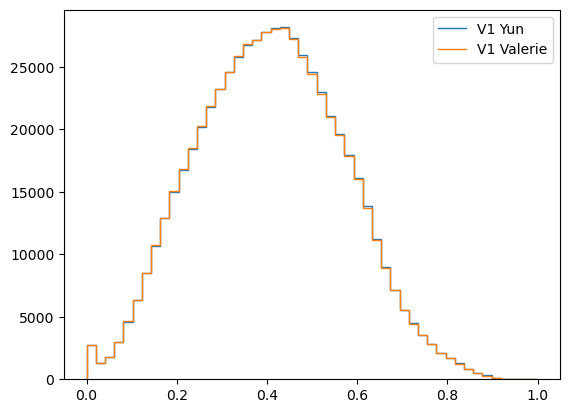

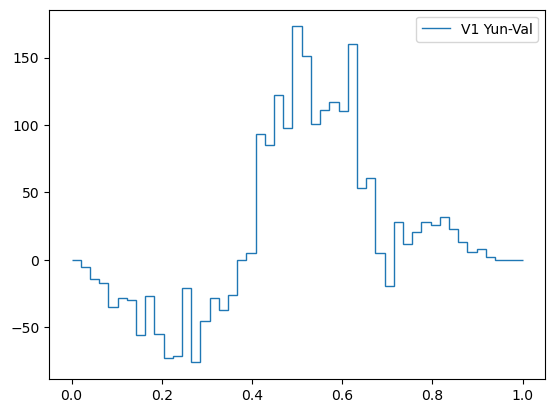

<Figure size 640x480 with 0 Axes>

In [61]:
binning = np.linspace(*binning_map["score_ggHnew_2018_nominal"])

histV1_Yun, edges = np.histogram(scores, bins=binning)
df_ggh = df_valerie[(df_valerie.channel_nominal == "ggh")]
scores_val = df_ggh["score_ggHnew_2018_nominal"]
histV1_val, _ = np.histogram(scores_val, bins=binning)


plt.stairs(histV1_Yun, edges, label = "V1 Yun")
plt.stairs(histV1_val, edges, label = "V1 Valerie")
plt.legend(loc="upper right")
plt.show()
# plt.savefig("../validation/stage2_validation.pdf")
plt.clf()
plt.stairs(histV1_Yun-histV1_val, edges, label = "V1 Yun-Val")
plt.legend(loc="upper right")
plt.show()
# plt.savefig("../validation/stage2_validationV1diffs.pdf")
plt.clf()


In [23]:
np.min(scores_val)

4.877048240814474e-07

In [24]:
len(scores_val)

622220

In [26]:
scores

entry
2        0.453473
6        0.293614
7        0.599458
8        0.710822
14       0.489720
           ...   
99890    0.435234
99891    0.587142
99892    0.440764
99896    0.372064
99898    0.347489
Name: score_ggHnew_2018_nominal, Length: 595013, dtype: float64

In [36]:
len(df_valerie)

622220

In [37]:
df_valerie

,entry,dataset,region,channel_nominal,category,dimuon_mass,score_ggHnew_2018_nominal,wgt_nominal
0,2,ggh_powheg,h-peak,ggh,All,126.358860,0.453473,0.000594
1,6,ggh_powheg,h-peak,ggh,All,126.172405,0.293614,0.000756
2,7,ggh_powheg,h-peak,ggh,All,124.239132,0.599458,0.000591
3,8,ggh_powheg,h-peak,ggh,All,123.407955,0.710822,0.000597
4,14,ggh_powheg,h-peak,ggh,All,124.892743,0.489720,0.000571
...,...,...,...,...,...,...,...,...
622215,99891,ggh_powheg,h-peak,ggh,All,126.336090,0.227753,0.000681
622216,99893,ggh_powheg,h-peak,ggh,All,125.246460,0.292824,0.000658
622217,99894,ggh_powheg,h-peak,ggh,All,125.827095,0.271237,0.000536
622218,99897,ggh_powheg,h-peak,ggh,All,126.316742,0.606424,0.000553


In [44]:
df_ggh = df_valerie[(df_valerie.channel_nominal == "ggh")]

In [50]:
df_ggh

,entry,dataset,region,channel_nominal,category,dimuon_mass,score_ggHnew_2018_nominal,wgt_nominal
0,2,ggh_powheg,h-peak,ggh,All,126.358860,0.453473,0.000594
1,6,ggh_powheg,h-peak,ggh,All,126.172405,0.293614,0.000756
2,7,ggh_powheg,h-peak,ggh,All,124.239132,0.599458,0.000591
3,8,ggh_powheg,h-peak,ggh,All,123.407955,0.710822,0.000597
4,14,ggh_powheg,h-peak,ggh,All,124.892743,0.489720,0.000571
...,...,...,...,...,...,...,...,...
622215,99891,ggh_powheg,h-peak,ggh,All,126.336090,0.227753,0.000681
622216,99893,ggh_powheg,h-peak,ggh,All,125.246460,0.292824,0.000658
622217,99894,ggh_powheg,h-peak,ggh,All,125.827095,0.271237,0.000536
622218,99897,ggh_powheg,h-peak,ggh,All,126.316742,0.606424,0.000553


In [45]:
len(df_ggh)

595013

In [46]:
df_vbf = df_valerie[~(df_valerie.channel_nominal == "ggh")]

In [47]:
df_vbf

,entry,dataset,region,channel_nominal,category,dimuon_mass,score_ggHnew_2018_nominal,wgt_nominal
47,90,ggh_powheg,h-sidebands,vbf,All,135.705325,NaN,0.000283
61,109,ggh_powheg,h-peak,ttHorVH,All,124.683415,NaN,0.000575
67,121,ggh_powheg,h-peak,ttHorVH,All,125.339951,NaN,0.000561
68,124,ggh_powheg,h-peak,vbf,All,121.286282,NaN,0.000653
73,129,ggh_powheg,h-peak,vbf,All,124.071876,NaN,0.000650
...,...,...,...,...,...,...,...,...
622086,99678,ggh_powheg,h-peak,vbf,All,122.932708,NaN,0.000630
622090,99685,ggh_powheg,h-peak,ttHorVH,All,126.077617,NaN,0.000586
622114,99726,ggh_powheg,h-sidebands,vbf,All,113.392804,NaN,0.000930
622144,99770,ggh_powheg,h-peak,ttHorVH,All,123.238203,NaN,0.001591
